## Evolution of the cyclone intensity (EKE and pmin) of all simulations 

Partially taken from the script by Behrooz Keshtgar "Lorenz Energy Cycle" for the calculation of eddy kinetic energy (EKE)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec

import xarray as xr
import numpy as np
import pandas as pd

from collections import defaultdict

from numba import njit
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patheffects as pe

In [3]:
#####################################################
# cyclone specific data
#####################################################
# channel_Xkm_0001: control simulations
# channel_Xkm_0002: +4K, qv consistent with T
# channel_Xkm_0003: +4k, qv from control
# channel_Xkm_0004: +temperature anomaly from MPI-ESM1-2-LR far future
# channel_Xkm_0005: +tropical temperature anomaly from MPI-ESM1-2-LR far future
# channel_Xkm_0006: +polar temperature anomaly from MPI-ESM1-2-LR far future

# Note that the  2-km experiments contain outputs every 6 hrs
# Note that the 80-km experiments contain outputs every 1 hrs


expname = {
      1: 'CTL',    
      2: 'T+4K',
      3: 'T+4K_RH-',
      4: 'T+anom',
      5: 'T+TRanom',
      6: 'T+POanom'
         }

exp80 = { 
      1:'channel_80km_0001',
      2:'channel_80km_0002',
      3:'channel_80km_0003',
      4:'channel_80km_0004',
      5:'channel_80km_0005',
      6:'channel_80km_0006',
      }

exp2 = { 
      1:'channel_2km_0001',
      2:'channel_2km_0002',
      3:'channel_2km_0003',
      4:'channel_2km_0004',
      5:'channel_2km_0005',
      6:'channel_2km_0006',
      }


In [4]:
experiments  = [exp2[1],exp2[2],exp2[3],exp2[4],exp2[5],exp2[6],exp80[1],exp80[2],exp80[3],exp80[4],exp80[5],exp80[6]]

In [5]:
def read_track_data(exp, track_dur,track_lon,track_lat,track_pmin):

    # path
    path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_tracks/'

    df_track = pd.read_csv(path_track+'Track_for_'+exp+'_6hrly_1x1latlon.csv')
    
    # extract vars of interest
    track_dur[exp]  = df_track['time'][7:33]+1
    track_lon[exp]  = df_track['lon'][7:33]
    track_lat[exp]  = df_track['lat'][7:33]
    track_pmin[exp] = df_track['pmin'][8:33]
    
    return track_dur,track_lon,track_lat,track_pmin

In [6]:

track_dur  = {}
track_lon  = {}
track_lat  = {}
track_pmin = {}

for exp in experiments:
    track_dur,track_lon,track_lat,track_pmin = read_track_data(exp,
                                                               track_dur,
                                                               track_lon,
                                                               track_lat,
                                                               track_pmin)

26
0 channel_2km_0001
6 channel_80km_0001
1 channel_2km_0002
7 channel_80km_0002
2 channel_2km_0003
8 channel_80km_0003
3 channel_2km_0004
9 channel_80km_0004
4 channel_2km_0005
10 channel_80km_0005
5 channel_2km_0006
11 channel_80km_0006


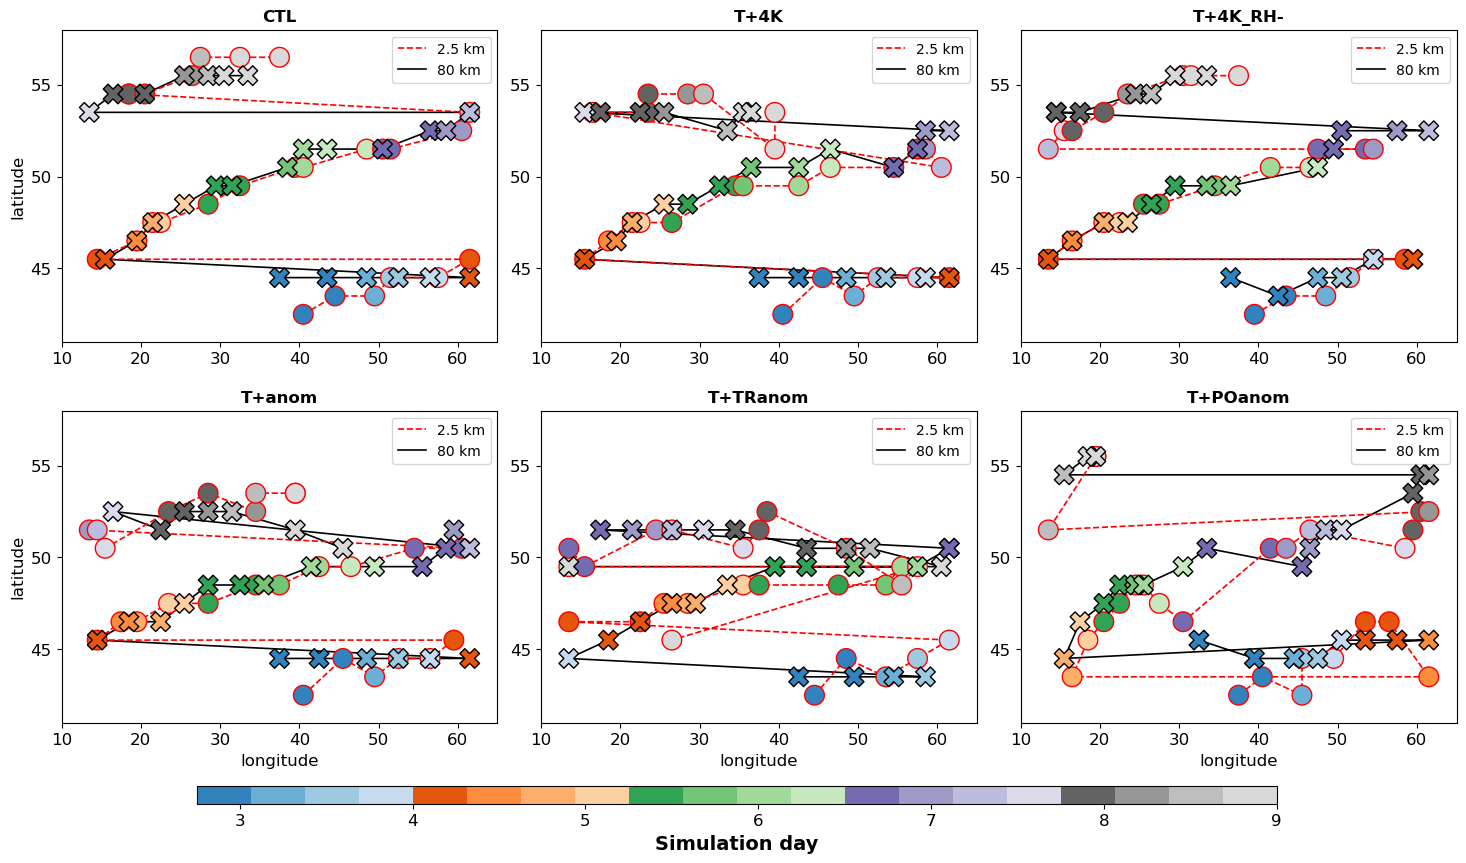

In [7]:
#####################################################
# Plot pmin track
#####################################################
from matplotlib.collections import LineCollection
print(len(track_dur[experiments[0]]))

plt.rcParams['savefig.facecolor']='white'
fig = plt.figure(figsize=(18, 9))

ax1 = plt.subplot(3,2,1)

for i in [0,6,1,7,2,8,3,9,4,10,5,11]:
    if i <=5: 
        ax1 = plt.subplot(2,3,i+1)
#for i in [1,4,5,6]:
    print(i, experiments[i])
    if i <= 5:
        lstyle='dashed'
        alpha=1
        marker='o'
        c1='red'
        lab='2.5 km'
        zo=2
    else:
        lstyle='solid'
        alpha=1
        marker='X'
        c1='k'
        lab='80 km'
        zo=1
    
    #plt.scatter(track_full[experiments[i]], x='lon', y='lat', size=100, color='time',alpha=alpha)

    plt.plot(track_lon[experiments[i]], track_lat[experiments[i]], linestyle=lstyle, linewidth=1.2, color=c1,label=lab,zorder=zo)
    s=plt.scatter(track_lon[experiments[i]], track_lat[experiments[i]],marker=marker,s=200, c=track_dur[experiments[i]],  edgecolor=c1, cmap='tab20c',alpha=alpha,zorder=15)
    
    if i <= 5:
        color='b'
    else:
        color='k'
    xs = track_lon[experiments[i]].to_numpy()
    ys = track_lat[experiments[i]].to_numpy()
    time = track_dur[experiments[i]].to_numpy()
    #for j in range(0,len(xs)):
    #    plt.text(xs[j], ys[j]+2, ''+str('{:02.0f}'.format(j))+'', ha='center',va='center',fontsize=10, zorder=1000)
    #for j in range(0,len(xs),4):
    #    plt.text(xs[j], ys[j], ''+str('{:1.0f}'.format(int(time[j])))+'', ha='center',va='center',color=color,fontsize=15, weight='bold',zorder=1000)
    if i <=5:
        plt.title(expname[i+1],fontweight='bold')
    plt.legend()

    plt.xlim(10, 65)
    plt.ylim(41, 58)
    if i == 3 or i==4 or i==5:
        plt.xlabel('longitude',fontsize=12)
    if i == 0 or i== 3:
        plt.ylabel('latitude',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks([45,50,55], fontsize=12)
    
cbaxes = fig.add_axes([0.2, 0.02, 0.6, 0.02]) 
cb = plt.colorbar(s,orientation='horizontal',
                  cax = cbaxes
                  )
cb.set_label(label='Simulation day',size=14,weight='bold')
cb.ax.tick_params(labelsize='large')
#plt.title('Track trajectory of exp '+exp+'', fontsize=14)
plt.subplots_adjust(wspace=0.1, hspace=0.22)
fig.savefig('Cyclonetracks_all.png', bbox_inches='tight',dpi=100)


26
0 channel_2km_0001
6 channel_80km_0001
1 channel_2km_0002
7 channel_80km_0002
2 channel_2km_0003
8 channel_80km_0003
3 channel_2km_0004
9 channel_80km_0004
4 channel_2km_0005
10 channel_80km_0005
5 channel_2km_0006
11 channel_80km_0006


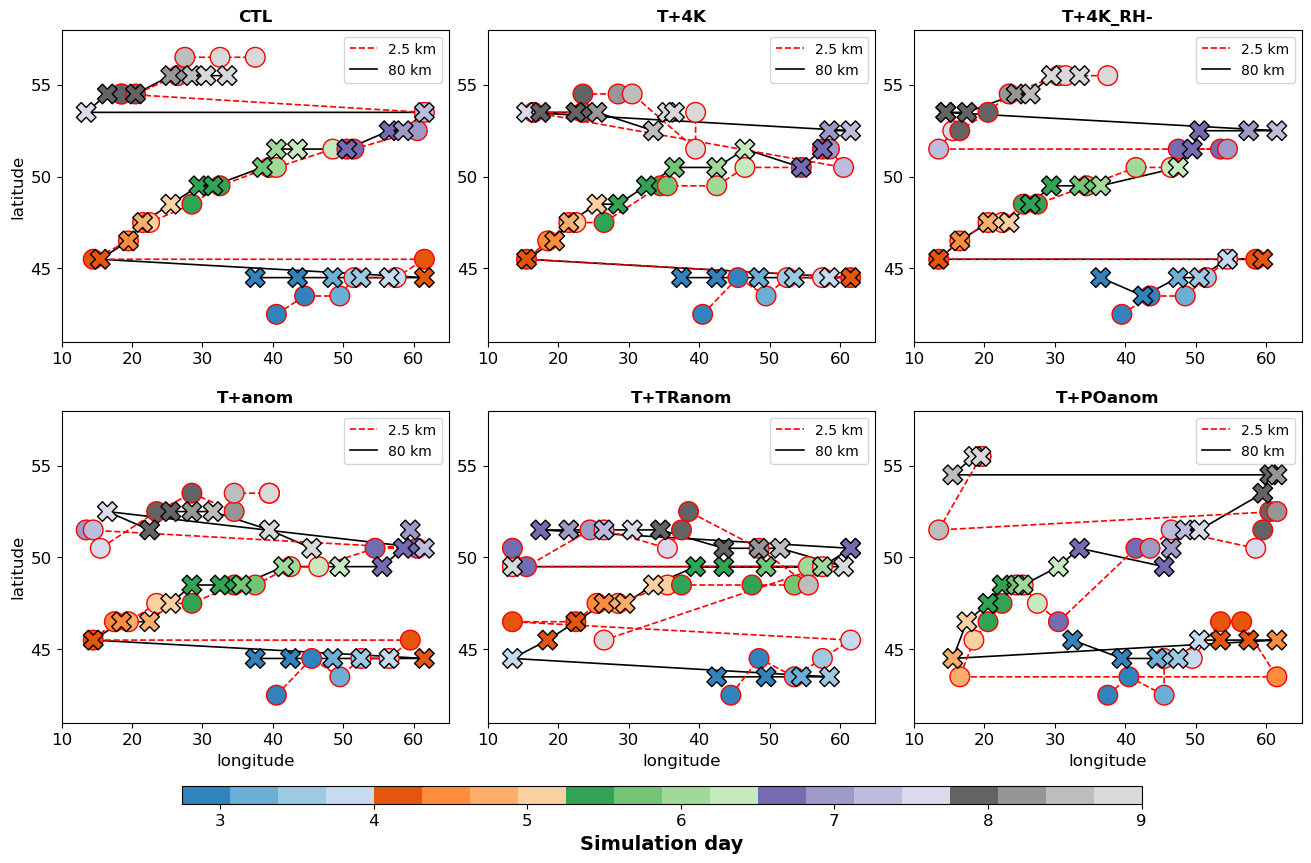

In [8]:
#####################################################
# Plot pmin track
#####################################################
from matplotlib.collections import LineCollection
print(len(track_dur[experiments[0]]))

plt.rcParams['savefig.facecolor']='white'
fig = plt.figure(figsize=(16, 9))

ax1 = plt.subplot(3,2,1)

for i in [0,6,1,7,2,8,3,9,4,10,5,11]:
    if i <=5: 
        ax1 = plt.subplot(2,3,i+1)
#for i in [1,4,5,6]:
    print(i, experiments[i])
    if i <= 5:
        lstyle='dashed'
        alpha=1
        marker='o'
        c1='red'
        lab='2.5 km'
        zo=2
    else:
        lstyle='solid'
        alpha=1
        marker='X'
        c1='k'
        lab='80 km'
        zo=1
    
    #plt.scatter(track_full[experiments[i]], x='lon', y='lat', size=100, color='time',alpha=alpha)

    plt.plot(track_lon[experiments[i]], track_lat[experiments[i]], linestyle=lstyle, linewidth=1.2, color=c1,label=lab,zorder=zo)
    s=plt.scatter(track_lon[experiments[i]], track_lat[experiments[i]],marker=marker,s=200, c=track_dur[experiments[i]],  edgecolor=c1, cmap='tab20c',alpha=alpha,zorder=15)
    
    if i <= 5:
        color='b'
    else:
        color='k'
    xs = track_lon[experiments[i]].to_numpy()
    ys = track_lat[experiments[i]].to_numpy()
    time = track_dur[experiments[i]].to_numpy()
    #for j in range(0,len(xs)):
    #    plt.text(xs[j], ys[j]+2, ''+str('{:02.0f}'.format(j))+'', ha='center',va='center',fontsize=10, zorder=1000)
    #for j in range(0,len(xs),4):
    #    plt.text(xs[j], ys[j], ''+str('{:1.0f}'.format(int(time[j])))+'', ha='center',va='center',color=color,fontsize=15, weight='bold',zorder=1000)
    if i <=5:
        plt.title(expname[i+1],fontweight='bold')
    plt.legend()

    plt.xlim(10, 65)
    plt.ylim(41, 58)
    if i == 3 or i==4 or i==5:
        plt.xlabel('longitude',fontsize=12)
    if i == 0 or i== 3:
        plt.ylabel('latitude',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks([45,50,55], fontsize=12)
    
cbaxes = fig.add_axes([0.2, 0.02, 0.6, 0.02]) 
cb = plt.colorbar(s,orientation='horizontal',
                  cax = cbaxes
                  )
cb.set_label(label='Simulation day',size=14,weight='bold')
cb.ax.tick_params(labelsize='large')
#plt.title('Track trajectory of exp '+exp+'', fontsize=14)
plt.subplots_adjust(wspace=0.1, hspace=0.22)
fig.savefig('Cyclonetracks_all.png', bbox_inches='tight',dpi=100)


26
0 channel_2km_0001
6 channel_80km_0001
1 channel_2km_0002
7 channel_80km_0002
2 channel_2km_0003
8 channel_80km_0003
3 channel_2km_0004
9 channel_80km_0004


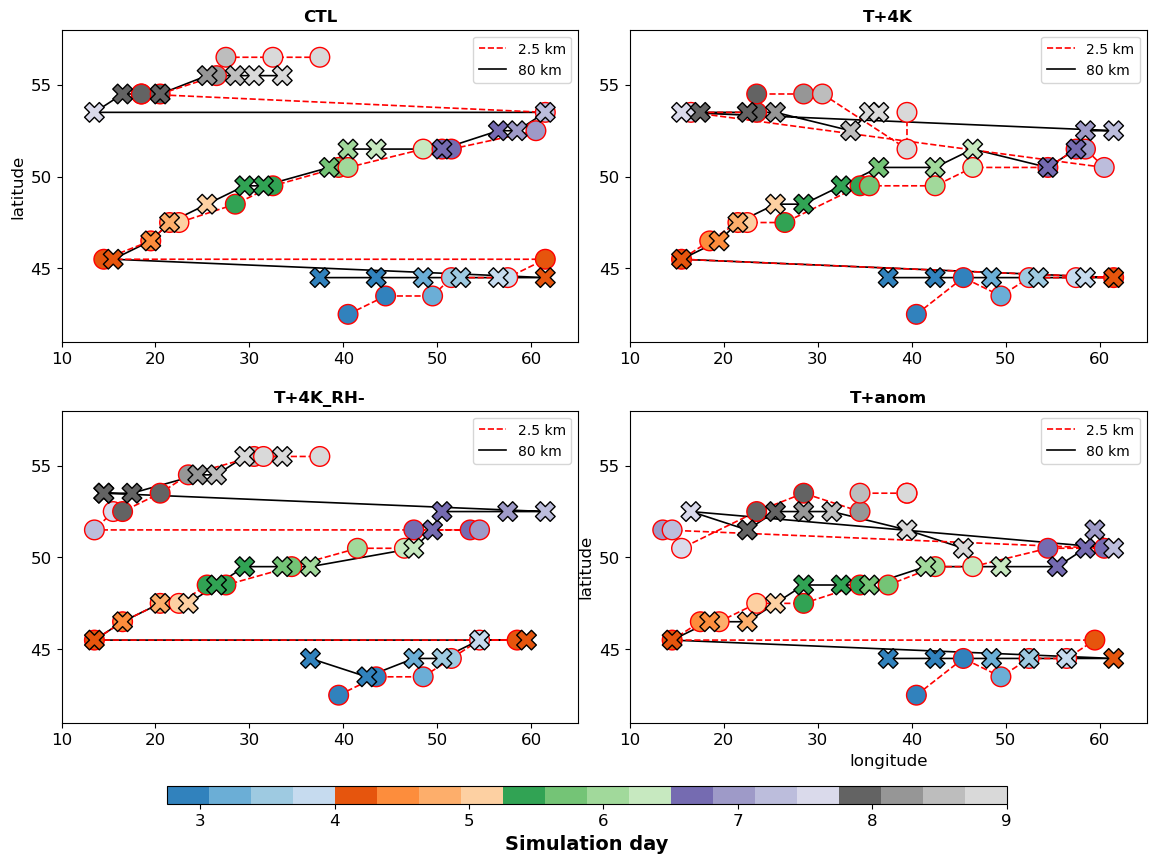

In [9]:
#####################################################
# Plot pmin track
#####################################################
from matplotlib.collections import LineCollection
print(len(track_dur[experiments[0]]))

plt.rcParams['savefig.facecolor']='white'
fig = plt.figure(figsize=(14, 9))


for i in [0,6,1,7,2,8,3,9]:
    if i <=5: 
        ax1 = plt.subplot(2,2,i+1)
#for i in [1,4,5,6]:
    print(i, experiments[i])
    if i <= 5:
        lstyle='dashed'
        alpha=1
        marker='o'
        c1='red'
        lab='2.5 km'
        zo=2
    else:
        lstyle='solid'
        alpha=1
        marker='X'
        c1='k'
        lab='80 km'
        zo=1
    
    #plt.scatter(track_full[experiments[i]], x='lon', y='lat', size=100, color='time',alpha=alpha)

    plt.plot(track_lon[experiments[i]], track_lat[experiments[i]], linestyle=lstyle, linewidth=1.2, color=c1,label=lab,zorder=zo)
    s=plt.scatter(track_lon[experiments[i]], track_lat[experiments[i]],marker=marker,s=200, c=track_dur[experiments[i]],  edgecolor=c1, cmap='tab20c',alpha=alpha,zorder=15)
    
    if i <= 5:
        color='b'
    else:
        color='k'
    xs = track_lon[experiments[i]].to_numpy()
    ys = track_lat[experiments[i]].to_numpy()
    time = track_dur[experiments[i]].to_numpy()
    #for j in range(0,len(xs)):
    #    plt.text(xs[j], ys[j]+2, ''+str('{:02.0f}'.format(j))+'', ha='center',va='center',fontsize=10, zorder=1000)
    #for j in range(0,len(xs),4):
    #    plt.text(xs[j], ys[j], ''+str('{:1.0f}'.format(int(time[j])))+'', ha='center',va='center',color=color,fontsize=15, weight='bold',zorder=1000)
    if i <=5:
        plt.title(expname[i+1],fontweight='bold')
    plt.legend()

    plt.xlim(10, 65)
    plt.ylim(41, 58)
    if i == 3 or i==4 or i==5:
        plt.xlabel('longitude',fontsize=12)
    if i == 0 or i== 3:
        plt.ylabel('latitude',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks([45,50,55], fontsize=12)
    
cbaxes = fig.add_axes([0.2, 0.02, 0.6, 0.02]) 
cb = plt.colorbar(s,orientation='horizontal',
                  cax = cbaxes
                  )
cb.set_label(label='Simulation day',size=14,weight='bold')
cb.ax.tick_params(labelsize='large')
#plt.title('Track trajectory of exp '+exp+'', fontsize=14)
plt.subplots_adjust(wspace=0.1, hspace=0.22)
fig.savefig('Cyclonetracks_all.png', bbox_inches='tight',dpi=100)


0 channel_80km_0001
1 channel_80km_0002
2 channel_80km_0003
3 channel_80km_0004
4 channel_80km_0005
5 channel_80km_0006
6 channel_2km_0001
7 channel_2km_0002
8 channel_2km_0003
9 channel_2km_0004
10 channel_2km_0005
11 channel_2km_0006
0 channel_80km_0001
1 channel_80km_0002
2 channel_80km_0003
3 channel_80km_0004
4 channel_80km_0005
5 channel_80km_0006
6 channel_2km_0001
7 channel_2km_0002
8 channel_2km_0003
9 channel_2km_0004
10 channel_2km_0005
11 channel_2km_0006


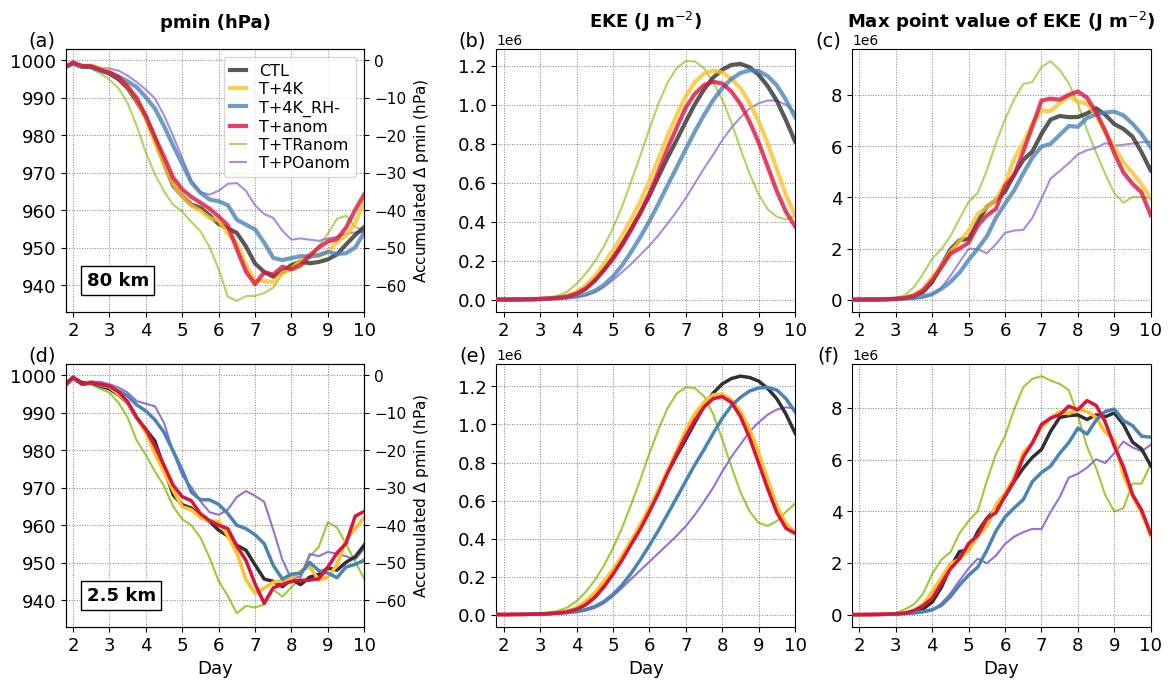

In [15]:
#####################################################
# Separate the 80 km and 2.5 km runs
#####################################################
fig = plt.figure(figsize=(14, 7.5))
fs=11.5

spec = fig.add_gridspec(ncols=4, nrows=2, width_ratios=[1,0.06,1,1],
                          height_ratios=[1,1])

ax2 = fig.add_subplot(spec[0, 0])
for count, sim in enumerate(list(simdict.keys())):
    print (count, sim)
    path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_tracks/'
    df_track = pd.read_csv(path_track+'Track_for_'+sim+'_6hrly_1x1latlon.csv')
    #if count >= 6: 
    # 2km first
    #    if count >=10:
    #        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=1.5, zorder=0)
    #    else:
    #        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=2.5, zorder=6 )
    #else:
    if count >=4 and count < 6: 
        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count+1], linewidth=1.5, alpha=0.8,label= simdict['channel_80km_000'+ str(count+1)]['case'], zorder=0)
    elif count < 6: 
        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count+1], linewidth=3, alpha=0.8,label= simdict['channel_80km_000'+ str(count+1)]['case'],zorder=6  )
        
ax2.legend(fontsize=fs,handlelength=1.0,labelspacing=0.2)#, bbox_to_anchor=(0.4, 0.95))
#plt.legend(fontsize=fs)
plt.ylim(933, 1003)
#plt.ylim(938, 1004)
plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
#plt.xlabel('Day',fontsize=12)
#plt.ylabel('pmin (hPa)',fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('pmin (hPa)', fontsize=13,y=1.05,weight='bold')

ax3 = ax2.twinx()
ax3.set_ylim((-67, 3))
plt.yticks(fontsize=11)
ax3.set_ylabel('Accumulated ' r'$\Delta$'' pmin (hPa)', fontsize=11)
#ax1.tick_params(axis='y', colors='orange')

ax1 = fig.add_subplot(spec[0, 2])
for i in range(0,6):
    if i >=4: 
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i+1], linewidth=1.5,  alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i+1], linewidth=3, alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=6)



#plt.ylabel('(J m$^{-2}$)',fontsize=13)
#plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('EKE (J m$^{-2}$)', fontsize=13,y=1.05,weight='bold')



ax4 = fig.add_subplot(spec[0, 3])

        
for i in range(0,6):
    if i >=4: 
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i+1], linewidth=1.5,  alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i+1], linewidth=3, alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=6)

#plt.ylabel('(J m$^{-2}$)',fontsize=13)
#plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('Max point value of EKE (J m$^{-2}$)', fontsize=13,y=1.05,weight='bold')



plt.text(-0.08, 1.07, '(b)', ha='center', va='top', transform=ax1.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(a)', ha='center', va='top', transform=ax2.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(c)', ha='center', va='top', transform=ax4.transAxes, fontsize=14) 

ax2.text(0.07,0.1,'80 km',
                     ha='left',
                     weight='bold',fontsize=13,
                     bbox=dict(ec='k',fc='white'),
                     transform=ax2.transAxes)
#==========================================================


ax2 = fig.add_subplot(spec[1, 0])
for count, sim in enumerate(list(simdict.keys())):
    print (count, sim)
    path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_tracks/'
    df_track = pd.read_csv(path_track+'Track_for_'+sim+'_6hrly_1x1latlon.csv')
    #if count >= 6: 
    # 2km first
    if count >=10:
            plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linewidth=1.5, zorder=0)
    elif count >=6 and count <10:
           plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5],  linewidth=2.5, zorder=6 )
    
#x2.legend(fontsize=fs,handlelength=1.0,labelspacing=0.3)#, bbox_to_anchor=(0.4, 0.95))
#plt.legend(fontsize=fs)
plt.ylim(933, 1003)
#plt.ylim(938, 1004)
plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
#plt.xlabel('Day',fontsize=12)
#plt.ylabel('pmin (hPa)',fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
#plt.title('pmin', fontsize=13)
plt.xlabel('Day',fontsize=13)

ax3 = ax2.twinx()
ax3.set_ylim((-67, 3))
plt.yticks(fontsize=11)
ax3.set_ylabel('Accumulated ' r'$\Delta$'' pmin (hPa)', fontsize=11)
#ax1.tick_params(axis='y', colors='orange')

ax1 = fig.add_subplot(spec[1, 2])
for i in range(6,12):
    # 2km 
    if i >=10:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i-5],linewidth=1.5,zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i-5],linewidth=2.5,zorder=6)


#plt.ylabel('(J m$^{-2}$)',fontsize=13)
plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
#plt.title('EKE', fontsize=13)



ax4 = fig.add_subplot(spec[1, 3])

        
for i in range(6,12):
    # 2km 
    if i >=10:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i-5],linewidth=1.5,zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i-5],linewidth=2.5,zorder=6)

#plt.ylabel('(J m$^{-2}$)',fontsize=13)
plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
#plt.title('Max point value of EKE', fontsize=13)

plt.text(-0.08, 1.07, '(e)', ha='center', va='top', transform=ax1.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(d)', ha='center', va='top', transform=ax2.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(f)', ha='center', va='top', transform=ax4.transAxes, fontsize=14) 


ax2.text(0.07,0.1,'2.5 km',
                     ha='left',
                     weight='bold',fontsize=13,
                     bbox=dict(ec='k',fc='white'),
                     transform=ax2.transAxes)


plt.subplots_adjust(wspace = 0.25, hspace = 0.2)

#plt.savefig('Fig3p_Cycloneintensity_all_6hres_2km_vs_80km_untilDay10.png', bbox_inches='tight',dpi=100)
#plt.savefig('./' + 'eke_' + '_allsims_' + res + '_EXP1-4.png', bbox_inches='tight',dpi=100)
plt.show()

0 channel_80km_0001
1 channel_80km_0002
2 channel_80km_0003
3 channel_80km_0004
4 channel_80km_0005
5 channel_80km_0006
6 channel_2km_0001
7 channel_2km_0002
8 channel_2km_0003
9 channel_2km_0004
10 channel_2km_0005
11 channel_2km_0006
0 channel_80km_0001
1 channel_80km_0002
2 channel_80km_0003
3 channel_80km_0004
4 channel_80km_0005
5 channel_80km_0006
6 channel_2km_0001
7 channel_2km_0002
8 channel_2km_0003
9 channel_2km_0004
10 channel_2km_0005
11 channel_2km_0006


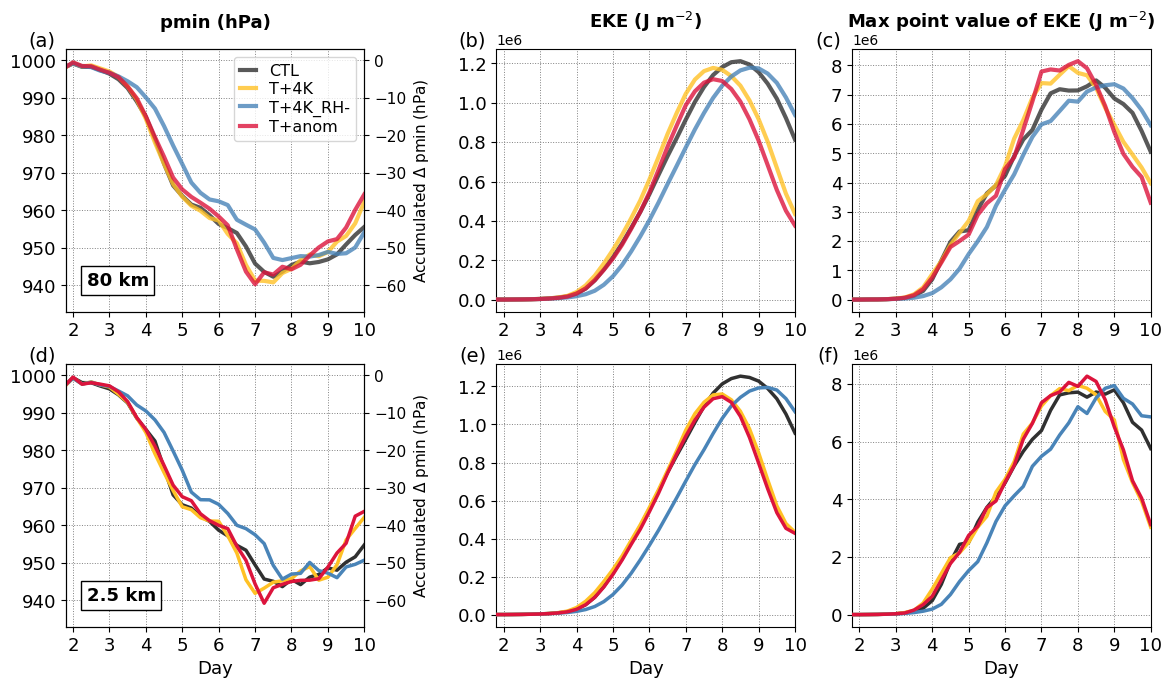

In [17]:
#####################################################
# Separate the 80 km and 2.5 km runs
#####################################################
fig = plt.figure(figsize=(14, 7.5))
fs=11.5

spec = fig.add_gridspec(ncols=4, nrows=2, width_ratios=[1,0.06,1,1],
                          height_ratios=[1,1])

ax2 = fig.add_subplot(spec[0, 0])
for count, sim in enumerate(list(simdict.keys())):
    print (count, sim)
    path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_tracks/'
    df_track = pd.read_csv(path_track+'Track_for_'+sim+'_6hrly_1x1latlon.csv')
    #if count >= 6: 
    # 2km first
    #    if count >=10:
    #        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=1.5, zorder=0)
    #    else:
    #        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=2.5, zorder=6 )
    #else:
    #if count >=4 and count < 6: 
    #    plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count+1], linewidth=1.5, alpha=0.8,label= simdict['channel_80km_000'+ str(count+1)]['case'], zorder=0)
    if count < 4: 
        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count+1], linewidth=3, alpha=0.8,label= simdict['channel_80km_000'+ str(count+1)]['case'],zorder=6  )
        
ax2.legend(fontsize=fs,handlelength=1.0,labelspacing=0.2)#, bbox_to_anchor=(0.4, 0.95))
#plt.legend(fontsize=fs)
plt.ylim(933, 1003)
#plt.ylim(938, 1004)
plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
#plt.xlabel('Day',fontsize=12)
#plt.ylabel('pmin (hPa)',fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('pmin (hPa)', fontsize=13,y=1.05,weight='bold')

ax3 = ax2.twinx()
ax3.set_ylim((-67, 3))
plt.yticks(fontsize=11)
ax3.set_ylabel('Accumulated ' r'$\Delta$'' pmin (hPa)', fontsize=11)
#ax1.tick_params(axis='y', colors='orange')

ax1 = fig.add_subplot(spec[0, 2])
for i in range(0,6):
    #if i >=4: 
    #    plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i+1], linewidth=1.5,  alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=0)
    if i < 4:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i+1], linewidth=3, alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=6)



#plt.ylabel('(J m$^{-2}$)',fontsize=13)
#plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('EKE (J m$^{-2}$)', fontsize=13,y=1.05,weight='bold')



ax4 = fig.add_subplot(spec[0, 3])

        
for i in range(0,6):
    #if i >=4: 
    #    plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i+1], linewidth=1.5,  alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=0)
    if i <4:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i+1], linewidth=3, alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=6)

#plt.ylabel('(J m$^{-2}$)',fontsize=13)
#plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('Max point value of EKE (J m$^{-2}$)', fontsize=13,y=1.05,weight='bold')



plt.text(-0.08, 1.07, '(b)', ha='center', va='top', transform=ax1.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(a)', ha='center', va='top', transform=ax2.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(c)', ha='center', va='top', transform=ax4.transAxes, fontsize=14) 

ax2.text(0.07,0.1,'80 km',
                     ha='left',
                     weight='bold',fontsize=13,
                     bbox=dict(ec='k',fc='white'),
                     transform=ax2.transAxes)
#==========================================================


ax2 = fig.add_subplot(spec[1, 0])
for count, sim in enumerate(list(simdict.keys())):
    print (count, sim)
    path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_tracks/'
    df_track = pd.read_csv(path_track+'Track_for_'+sim+'_6hrly_1x1latlon.csv')
    #if count >= 6: 
    # 2km first
    #if count >=10:
    #        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linewidth=1.5, zorder=0)
    if count >=6 and count <10:
           plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5],  linewidth=2.5, zorder=6 )
    
#x2.legend(fontsize=fs,handlelength=1.0,labelspacing=0.3)#, bbox_to_anchor=(0.4, 0.95))
#plt.legend(fontsize=fs)
plt.ylim(933, 1003)
#plt.ylim(938, 1004)
plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
#plt.xlabel('Day',fontsize=12)
#plt.ylabel('pmin (hPa)',fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
#plt.title('pmin', fontsize=13)
plt.xlabel('Day',fontsize=13)

ax3 = ax2.twinx()
ax3.set_ylim((-67, 3))
plt.yticks(fontsize=11)
ax3.set_ylabel('Accumulated ' r'$\Delta$'' pmin (hPa)', fontsize=11)
#ax1.tick_params(axis='y', colors='orange')

ax1 = fig.add_subplot(spec[1, 2])
for i in range(6,12):
    # 2km 
    #if i >=10:
    #    plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i-5],linewidth=1.5,zorder=0)
    if i <10:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i-5],linewidth=2.5,zorder=6)


#plt.ylabel('(J m$^{-2}$)',fontsize=13)
plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
#plt.title('EKE', fontsize=13)



ax4 = fig.add_subplot(spec[1, 3])

        
for i in range(6,12):
    # 2km 
    #if i >=10:
    #    plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i-5],linewidth=1.5,zorder=0)
    if i <10:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i-5],linewidth=2.5,zorder=6)

#plt.ylabel('(J m$^{-2}$)',fontsize=13)
plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
#plt.title('Max point value of EKE', fontsize=13)

plt.text(-0.08, 1.07, '(e)', ha='center', va='top', transform=ax1.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(d)', ha='center', va='top', transform=ax2.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(f)', ha='center', va='top', transform=ax4.transAxes, fontsize=14) 


ax2.text(0.07,0.1,'2.5 km',
                     ha='left',
                     weight='bold',fontsize=13,
                     bbox=dict(ec='k',fc='white'),
                     transform=ax2.transAxes)


plt.subplots_adjust(wspace = 0.25, hspace = 0.2)

plt.savefig('Fig3_Cycloneintensity_4exp_6hres_2km_vs_80km_untilDay10.png', bbox_inches='tight',dpi=100)
#plt.savefig('./' + 'eke_' + '_allsims_' + res + '_EXP1-4.png', bbox_inches='tight',dpi=100)
plt.show()